# Deterministic Modelling of Contagious Disease

In this notebook we will briefly describe deterministic modelling of contagious disease and build some well known mathematical models authored or referred to in some of the papers in the references section.

### Some introduction before we get started....

In deterministic modelling we get an output from some model based on the initial conditions and some parameter values. In stochastic modelling we use the same parameter values and the initial conditions will lead to an ensemble of differing outputs due to inherent randomness that's embedded in the model. Both of these types of techniques are used to model epidemiological dynamics at a population level and particularly infectious disease. Historically deterministic models are a prudent means of modelling an infectious disease because they require no data and quite simple to setup and we will focus on these methods in this post.

When using deterministic models to invetigate, predict and control infectious disease it is often based on the nonlinear dynamics of infection spread in a population (population dynamics). This is usually done by splitting the population up into compartments based on the health status of the individuals. For example in the SIR model we will look at we divide the population into:

-  Succeptibles - those succeptable to the disease.
-  Infectives - those infected by the disease.
-  Removed - those removed (cured, immunized, death).

Now using these population compartments we model our dynamic disease/population system to attempt to determine what happens to the population given various disease scenarios and understand the interdependence between individuals in the system. The models we will work through here are quite simplistic, and modelling infection in a population is a very difficult task, it's a very complex system that changes dynamically and adapts to exogenous (variation in contact rate due to the season, etc.) and endogenous factors (herd immunity etc.).

Another important consideration is the value of $R_0$ which is known as the basic reproduction number and signifies the number of succeptable individuals a single infected individual can infect. $R_0$ needs to be under 1 for a pandemic to die out.

$R_0 = \frac{\beta}{\gamma}$

## Modelling Contagious Disease

### <u>SIR</u>

Starting here with a simple __SIR__ model that is for a closed population of size $N$. 

Let _t_ be the independent variable, $I(t)$ and $S(t)$ be continuous where:

$S(t) = $ number of susceptibles at time _t_.

$I(t) = $ number of infectives at time _t_.

Making a significant assumption that the rate of occurrence of new infections is proportional to both the number of infectives and succeptables:

$I(t+\Delta t)=I(t)+\beta I(t)S(t)\Delta t$

where $\beta$ is the infection rate (contact rate), in the limit as $\Delta t \to 0$, which yeilds:

$ \displaystyle \frac{dI}{dt} = \displaystyle \beta S(t)I(t)$

with initial conditions $S(0)=n, I(0)=a$

The total population size is $n + a$, all individuals are either infected or succeptable and $S(t)+I(t)=n+a$ for all _t_ and it follows that:

$ \displaystyle \frac{dI}{dt} = \displaystyle \beta I(t){n + a - I(t)}$

In Caldwell and Rams' intial work, the above model was used to achieve highly accurate results. In this work they introduced the third variable $R(t)$ to represent the removal of individuals from the infected population by means of isolation, death, reovery and immunity, at a given time _t_, which is a much more realistic and general model of a epidemic.

The following assumptions are made for this improved model:
-  Removals include infectives who are isolated, dead, recovered and immune;
-  The immune or recovered individuals enter a new class where they are not succeptable.

let:
-  $R(t)=$ the number removals at time _t_.

-  $\beta =$ the infection rate.

-  $\gamma =$ the removal rate.

-  $n=$ the size of the community.

we now have:

$S(t) + I(t) + R(t) = n$

The number of succeptables is only proportional to the number of infectives and the number of succeptables. If infectives are removed from the system/community they will not continue the spread. The differential equation describes the rate of change of transmition between the infective and succeptables given a contant infection rate, and this will be negative which makes sense here as the disease spreads the succeptable population will decrease:

$ \displaystyle \frac{dS(t)}{dt} = \displaystyle -\beta S(t)I(t)$

The removals should be considered for the DE for the infectives as the removals include infectives who are isolated, dead or recovered and immune. The immune and or recovered would then enter a new class that are not succeptable to the disease. Our infective population should grow as we have the population flowing from the succeptable group and into the infective and then we need to account for removals by subtracting the removal rate times the infectives:

$ \displaystyle \frac{dI}{dt} = \displaystyle \beta S(t)I(t) - \gamma I(t)$

The number of removals, or those removed from the infectives by means of death, immunization and cured with the removal rate $\gamma$:

$ \displaystyle \frac{dR(t)}{dt} = \displaystyle \gamma I(t)$

Now let's use scipys odeint function to solve our system of DE's and plot our model results.

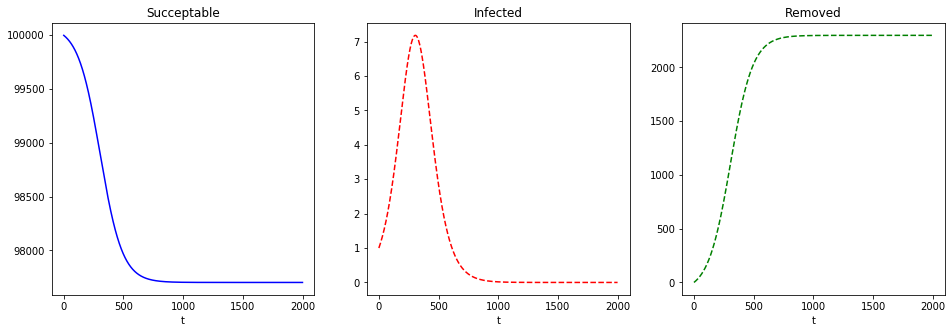

In [1]:
import matplotlib.pyplot as plt
from scipy.integrate import odeint

beta = 9e-6 # Infection (contact) rate
gamma = 0.89 # removal rate (cured, immunized, death)

def contagious_disease(x, t):
    S = x[0] # Succeptable
    I = x[1] # Infected
    R = x[2] # Removed
    dSdt = -beta * S *I
    dIdt = (beta * S * I) - (gamma * I)
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

# Our initial conditions: 99999 succeptable, 1 infected, 0 removed.
x0 = [99999, 1, 0]

t = range(2000)
res = odeint(contagious_disease, x0, t)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,5))
ax1.plot(t,res[:,0],'b-')
ax1.set_title('Succeptable')
ax1.set_xlabel('t')
ax2.plot(t,res[:,1],'r--')
ax2.set_title('Infected')
ax2.set_xlabel('t')
ax3.plot(t,res[:,2],'g--')
ax3.set_title('Removed')
ax3.set_xlabel('t')
plt.show()

Running the model with $\beta = 9\times10^{-6}$ and $\gamma = 0.89$ for 2000 days we can see that the number of removals grows exponentially and then plateaus at around the 1000th day mark. This indicating that the number removals stabilizes and at this threshold no additional removals occur.

Now let's look at how varying the Infection rate ($\beta$) and Removal rate ($\gamma$) effect our model.

### Varying Infection Rate ($\beta$)

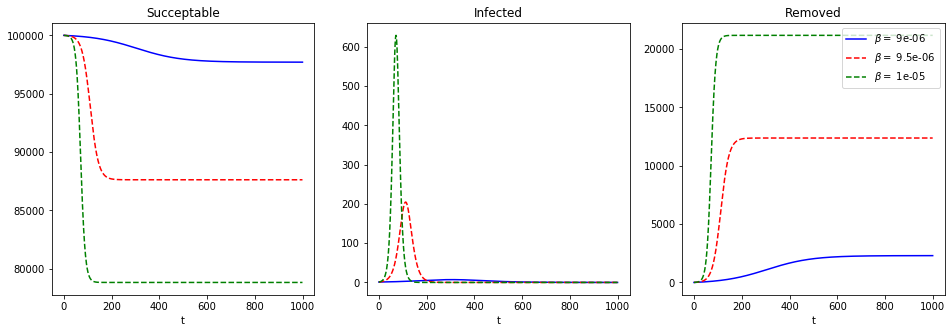

In [2]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,5))
for idx, beta in enumerate([9e-6, 9.5e-6, 1e-5]): # Infection (contact) rate # 1e-5
    
    gamma = 0.89 # removal rate (cured, immunized, death)
    
    def contagious_disease(x, t):
        S = x[0] # Succeptable
        I = x[1] # Infected
        R = x[2] # Removed
        dSdt = -beta * S *I
        dIdt = (beta * S * I) - (gamma * I)
        dRdt = gamma * I
        return [dSdt, dIdt, dRdt]
    
    # Our initial conditions: 99999 succeptable, 1 infected, 0 removed.
    x0 = [99999, 1, 0]

    t = range(1000)
    res = odeint(contagious_disease, x0, t)
    cols = ['b-', 'r--', 'g--']
    axs = [ax1, ax2, ax3]
    titles = ['Succeptable', 'Infected', 'Removed']
    for i in range(3):
        axs[i].plot(t,res[:,i],cols[idx],label=r'$\beta=$ ' + str(beta))
        axs[i].set_title(titles[i])
        axs[i].set_xlabel('t')
        
plt.legend(loc='upper right')
plt.show()

Running three different infection rates through our model we can see that as the infection rate increases as does the gradient of our curves and the shorter time taken to plateau for succeptables and removed individuals. 

### Varying Removal Rate ($\gamma$)

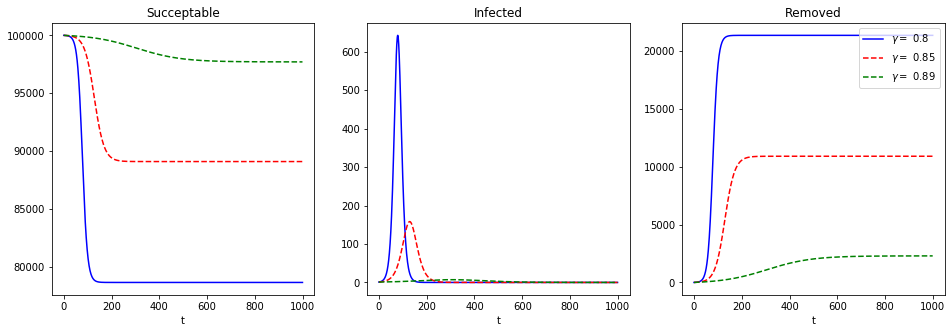

In [3]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,5))
for idx, gamma in enumerate([0.8, 0.85, 0.89]): # removal rate
    
    beta = 9e-6 # infection rate
    
    def contagious_disease(x, t):
        S = x[0] # Succeptable
        I = x[1] # Infected
        R = x[2] # Removed
        dSdt = -beta * S *I
        dIdt = (beta * S * I) - (gamma * I)
        dRdt = gamma * I
        return [dSdt, dIdt, dRdt]
    
    # Our initial conditions: 99999 succeptable, 1 infected, 0 removed.
    x0 = [99999, 1, 0]

    t = range(1000)
    res = odeint(contagious_disease, x0, t)
    cols = ['b-', 'r--', 'g--']
    axs = [ax1, ax2, ax3]
    titles = ['Succeptable', 'Infected', 'Removed']
    for i in range(3):
        axs[i].plot(t,res[:,i],cols[idx],label=r'$\gamma=$ ' + str(gamma))
        axs[i].set_title(titles[i])
        axs[i].set_xlabel('t')
        
plt.legend(loc='upper right')
plt.show()

Again we see a pretty clear effect as we reduce the removal rate the steeper the curves gradient and the shorter time it takes to plateau.

So looking at some other models that have additional factors to consider, we now look at the __SEIR__ model. This model is suited to diseases where there's an infection/infectious lag as it accounts for the latent periods of diseases which is the time taken between an individual being infected and then becoming infectious. Our __SIR__ model was for instances when there is no lag period between an individual becoming infected and then being infectious. 

## <u>SEIR</u>

The __SEIR__ model is quite similar to the previous __SIR__ model. Again it is for a closed population of size $N$.

let:
-  $R(t)=$ the number removals at time _t_.

-  $\beta =$ the infection rate.

-  $\gamma =$ the removal rate.

-  $\alpha =$ rate at which the exposed move to infective.

-  $n=$ the size of the community.

We now have:

$S(t) + E(t) + I(t) + R(t) = n$

The change in succeptables per unit time:

$ \displaystyle \frac{dS(t)}{dt} = \displaystyle -\beta S(t)I(t)$

The change in individuals who have been infected but not yet infectious:

$ \displaystyle \frac{dE(t)}{dt} = \displaystyle \beta S(t)I(t) - \alpha E(t)$

The change in infectious individuals, capable of spreading the disease:

$ \displaystyle \frac{dI}{dt} = \displaystyle \alpha E(t) - \gamma I(t)$

The changed in removed individuals:

$ \displaystyle \frac{dR(t)}{dt} = \displaystyle \gamma I(t)$

Now let's use scipys odeint function to solve our system of DE's and plot our model results.

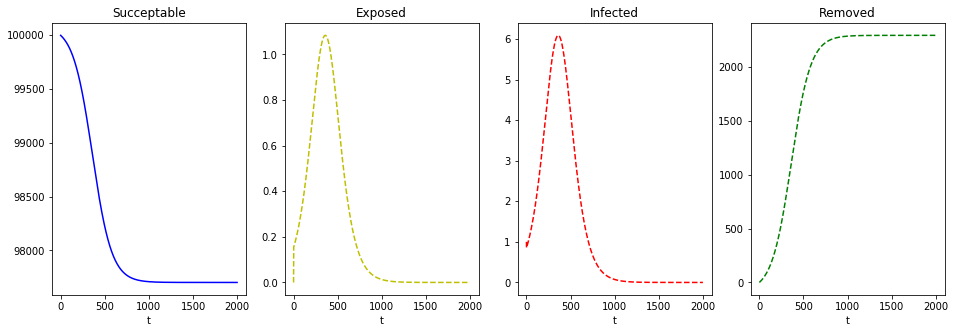

In [4]:
import matplotlib.pyplot as plt
from scipy.integrate import odeint

beta = 9e-6 # Infection (contact) rate
gamma = 0.89 # removal rate (cured, immunized, death)
alpha = 5

def contagious_disease(x, t):
    S = x[0] # Succeptable
    E = x[1] # Exposed
    I = x[2] # Infected
    R = x[3] # Removed
    dSdt = -beta * S * I
    dEdt = (beta * S * I) - (alpha * E)
    dIdt = (alpha * E) - (gamma * I)
    dRdt = gamma * I
    return [dSdt, dEdt, dIdt, dRdt]

# Our initial conditions: 99999 succeptable, 1 infected, 0 removed.
x0 = [99998, 0, 1, 0]

t = range(2000)
res = odeint(contagious_disease, x0, t)

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16,5))
ax1.plot(t,res[:,0],'b-')
ax1.set_title('Succeptable')
ax1.set_xlabel('t')
ax2.plot(t,res[:,1],'y--')
ax2.set_title('Exposed')
ax2.set_xlabel('t')
ax3.plot(t,res[:,2],'r--')
ax3.set_title('Infected')
ax3.set_xlabel('t')
ax4.plot(t,res[:,3],'g--')
ax4.set_title('Removed')
ax4.set_xlabel('t')
plt.show()

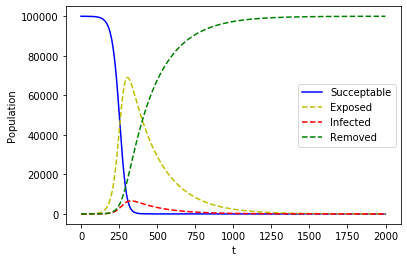

In [5]:
beta = 0.75 # Infection (contact) rate
gamma = 1/20 # removal rate (cured, immunized, death)
alpha = 0.005

def contagious_disease(x, t):
    S = x[0] # Succeptable
    E = x[1] # Exposed
    I = x[2] # Infected
    R = x[3] # Removed
    dSdt = -beta * S * I/100000
    dEdt = (beta * S * I/100000) - (alpha * E)
    dIdt = (alpha * E) - (gamma * I)
    dRdt = gamma * I
    return [dSdt, dEdt, dIdt, dRdt]

# Our initial conditions: 99999 succeptable, 1 infected, 0 removed.
x0 = [99999, 0, 1, 0]

t = range(2000)
res = odeint(contagious_disease, x0, t)

plt.plot(t,res[:,0],'b-', label='Succeptable')
plt.plot(t,res[:,1],'y--', label='Exposed')
plt.plot(t,res[:,2],'r--', label='Infected')
plt.plot(t,res[:,3],'g--', label='Removed')
plt.ylabel('Population')
plt.xlabel('t')
plt.legend(loc='best')
plt.show()

### Varying Infection Rate ($\beta$)

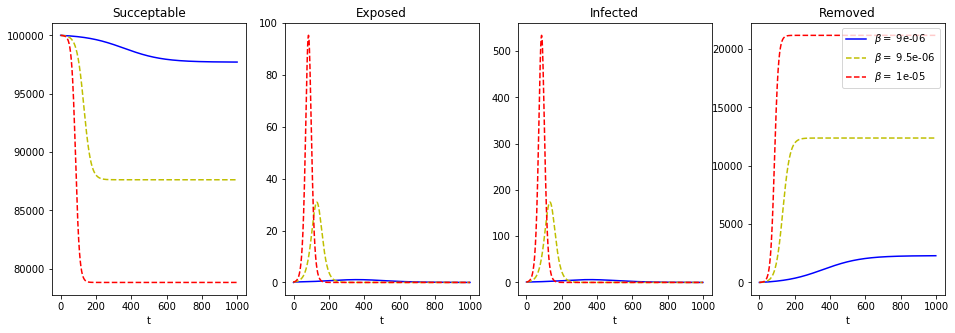

In [6]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16,5))
for idx, beta in enumerate([9e-6, 9.5e-6, 1e-5]): # Infection (contact) rate # 1e-5
    
    gamma = 0.89 # removal rate (cured, immunized, death)
    alpha = 5
    
    def contagious_disease(x, t):
        S = x[0] # Succeptable
        E = x[1] # Exposed
        I = x[2] # Infected
        R = x[3] # Removed
        dSdt = -beta * S * I
        dEdt = (beta * S * I) - (alpha * E)
        dIdt = (alpha * E) - (gamma * I)
        dRdt = gamma * I
        return [dSdt, dEdt, dIdt, dRdt]

    # Our initial conditions: 99999 succeptable, 1 infected, 0 removed.
    x0 = [99998, 0, 1, 0]

    t = range(2000)
    res = odeint(contagious_disease, x0, t)

    t = range(1000)
    res = odeint(contagious_disease, x0, t)
    cols = ['b-', 'y--', 'r--', 'g--']
    axs = [ax1, ax2, ax3, ax4]
    titles = ['Succeptable', 'Exposed', 'Infected', 'Removed']
    for i in range(4):
        axs[i].plot(t,res[:,i],cols[idx],label=r'$\beta=$ ' + str(beta))
        axs[i].set_title(titles[i])
        axs[i].set_xlabel('t')
        
plt.legend(loc='upper right')
plt.show()

### Varying Removal Rate ($\gamma$)

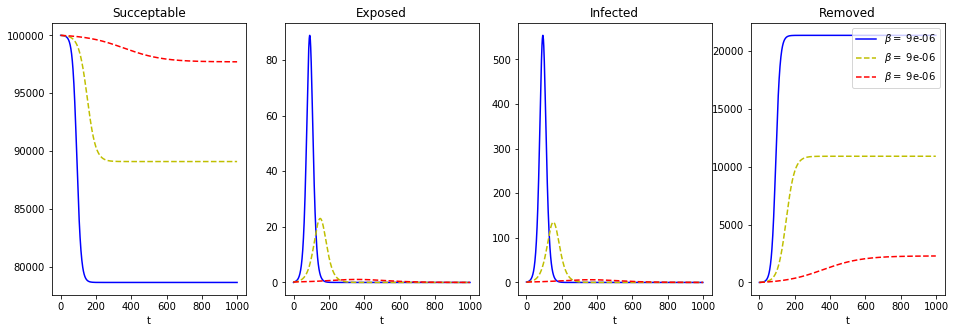

In [7]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16,5))
for idx, gamma in enumerate([0.8, 0.85, 0.89]): # removal rate
    
    beta = 9e-6 # infection rate
    alpha = 5
    
    def contagious_disease(x, t):
        S = x[0] # Succeptable
        E = x[1] # Exposed
        I = x[2] # Infected
        R = x[3] # Removed
        dSdt = -beta * S * I
        dEdt = (beta * S * I) - (alpha * E)
        dIdt = (alpha * E) - (gamma * I)
        dRdt = gamma * I
        return [dSdt, dEdt, dIdt, dRdt]

    # Our initial conditions: 99999 succeptable, 1 infected, 0 removed.
    x0 = [99998, 0, 1, 0]

    t = range(2000)
    res = odeint(contagious_disease, x0, t)

    t = range(1000)
    res = odeint(contagious_disease, x0, t)
    cols = ['b-', 'y--', 'r--', 'g--']
    axs = [ax1, ax2, ax3, ax4]
    titles = ['Succeptable', 'Exposed', 'Infected', 'Removed']
    for i in range(4):
        axs[i].plot(t,res[:,i],cols[idx],label=r'$\beta=$ ' + str(beta))
        axs[i].set_title(titles[i])
        axs[i].set_xlabel('t')
        
plt.legend(loc='upper right')
plt.show()

### Varying Incubation Time ($\alpha$)

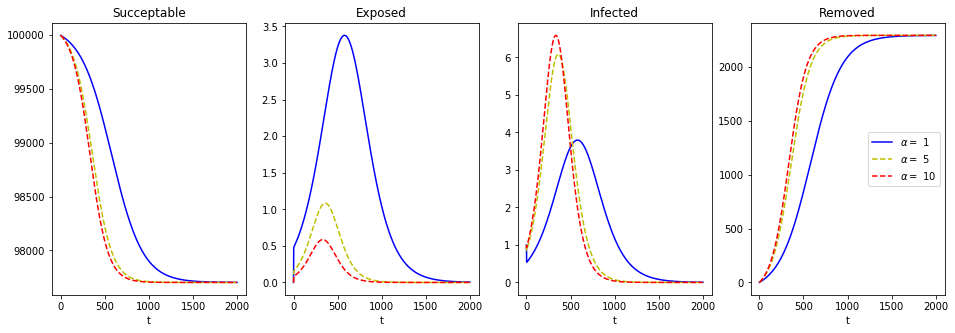

In [8]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16,5))
for idx, alpha in enumerate([1, 5, 10]): # Incubation time (days)
    
    beta = 9e-6 # infection rate
    gamma = 0.89
    
    def contagious_disease(x, t):
        S = x[0] # Succeptable
        E = x[1] # Exposed
        I = x[2] # Infected
        R = x[3] # Removed
        dSdt = -beta * S * I
        dEdt = (beta * S * I) - (alpha * E)
        dIdt = (alpha * E) - (gamma * I)
        dRdt = gamma * I
        return [dSdt, dEdt, dIdt, dRdt]

    # Our initial conditions: 99999 succeptable, 1 infected, 0 removed.
    x0 = [99998, 0, 1, 0]

    t = range(2000)
    res = odeint(contagious_disease, x0, t)

    t = range(2000)
    res = odeint(contagious_disease, x0, t)
    cols = ['b-', 'y--', 'r--', 'g--']
    axs = [ax1, ax2, ax3, ax4]
    titles = ['Succeptable', 'Exposed', 'Infected', 'Removed']
    for i in range(4):
        axs[i].plot(t,res[:,i],cols[idx],label=r'$\alpha=$ ' + str(alpha))
        axs[i].set_title(titles[i])
        axs[i].set_xlabel('t')
        
plt.legend(loc='center right')
plt.show()

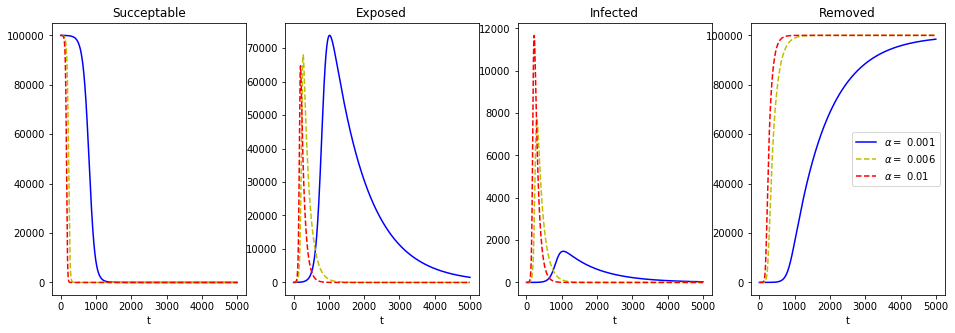

In [9]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16,5))
for idx, alpha in enumerate([0.001, 0.006, 0.010]): # Incubation time (days)
    
    beta = 0.75 # infection rate
    gamma = 1/20 # Removal / recovery
    
    def contagious_disease(x, t):
        S = x[0] # Succeptable
        E = x[1] # Exposed
        I = x[2] # Infected
        R = x[3] # Removed
        dSdt = -beta * S * I/100000
        dEdt = (beta * S * I/100000) - (alpha * E)
        dIdt = (alpha * E) - (gamma * I)
        dRdt = gamma * I
        return [dSdt, dEdt, dIdt, dRdt]

    # Our initial conditions: 99999 succeptable, 1 infected, 0 removed.
    x0 = [99998, 0, 1, 0]

    t = range(5000)
    res = odeint(contagious_disease, x0, t)

    t = range(5000)
    res = odeint(contagious_disease, x0, t)
    cols = ['b-', 'y--', 'r--', 'g--']
    axs = [ax1, ax2, ax3, ax4]
    titles = ['Succeptable', 'Exposed', 'Infected', 'Removed']
    for i in range(4):
        axs[i].plot(t,res[:,i],cols[idx],label=r'$\alpha=$ ' + str(alpha))
        axs[i].set_title(titles[i])
        axs[i].set_xlabel('t')
        
plt.legend(loc='center right')
plt.show()

Now let's take a look at running this model with some 

<u>References</u>

_Caldwell, J. and Yan, T.H., "Deterministic model in the theory of contagious disease," Int. J. Math. Educ. Sci. Techol., 31, 2000, 249-260._

_Dadlani, A., Afolabi, R.O., Jung, H., Sohraby, K., & Kim, K. (2020). Deterministic Models in Epidemiology: From Modeling to Implementation. arXiv: Populations and Evolution._

_H Trottier, P Philippe. Deterministic Modeling Of Infectious Diseases: Theory And Methods. The Internet Journal of Infectious Diseases. 2000 Volume 1 Number 2._